#Dataset Description

\
# Upload Dataset : https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets

## The dataset contains information about Used Cars Price with the following columns:

`Id`: Column identifier

`City`: List of countries where smart cities across the world are located.

`Country`: The location in which the car is being sold or is available for purchase.

`Smart_Mobility`: Index calculated from assessment of city-wide Public Transportation System, ICT, accessibility infrastructure..

`Smart_Environment`: Index calculated from environmental sustainability impact, monitoring pollution and energy management.

`Smart_Government`: Index calculated from comparative study of transparent governance & open data initiatives of smart cities across the

`Smart_Economy`: Index calculated through global comparison of city-wide productivity, economic vitality, and support for

`Smart_People`: Index calculated by comparing social and cultural plurality, education systems and its supporting ancillary.

`Smart_Living`: Index calculated by measuring metric around healthcare services, social security and housing quality.

`SmartCity_Index`: Aggregate score for smart city model based on smart city supergroups.


#Tasks

## 1 . Data Cleaning

### Read the dataset

In [7]:
import pandas as pd

In [247]:
df = pd.read_csv("Smart_City_index_headers.csv")

### Handling Missing Values

In [53]:
df.isna().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [55]:
df.duplicated().sum()

0

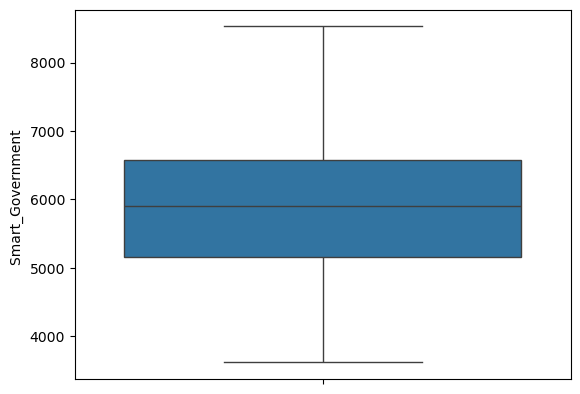

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Smart_Government '])
plt.show()

### Correct any inconsistent data entries.

In [239]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df , 'Smart_Government ')

### Ensure data types are appropriate for each column.

---

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 102 non-null    int64 
 1   City                               102 non-null    object
 2   Country                            102 non-null    object
 3   Smart_Mobility                     102 non-null    int64 
 4   Smart_Environment                  102 non-null    int64 
 5   Smart_Government                   102 non-null    int64 
 6   Smart_Economy                      102 non-null    int64 
 7   Smart_People                       102 non-null    int64 
 8   Smart_Living                       102 non-null    int64 
 9   SmartCity_Index                    102 non-null    int64 
 10  SmartCity_Index_relative_Edmonton  102 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.9+ KB


## 2. Exploratory Data Analysis (EDA)

In [69]:
df["Country"].value_counts()

Country
Italy                   11
Finland                 10
Germany                 10
United States            7
France                   7
Canada                   6
Norway                   4
Australia                4
Denmark                  4
Sweden                   3
United Kingdom           3
China                    3
South Korea              2
Spain                    2
Japan                    2
United Arab Emirates     2
Switzerland              2
Russia                   2
Hungary                  1
Czech Republic           1
Israel                   1
Malaysia                 1
Slovenia                 1
Slovakia                 1
Portugal                 1
New Zealand              1
Estonia                  1
Ireland                  1
Belgium                  1
Netherlands              1
Luxembourg               1
Iceland                  1
Taiwan                   1
Singapore                1
Austria                  1
Latvia                   1
Name: count, dtype: 

In [75]:
df["City"].unique()

array(['Oslo', 'Bergen', 'Amsterdam', 'Copenhagen', 'Stockholm',
       'Montreal', 'Vienna', 'Odense', 'Singapore', 'Boston', 'Zurich',
       'Trondheim', 'Västerås', 'Aalborg', 'Ottawa', 'Washington, DC',
       'Stavanger', 'Los Angeles', 'Helsinki', 'Vancouver', 'Berlin',
       'Toronto', 'New York', 'Chicago', 'Taipei', 'Düsseldorf',
       'Reykjavik', 'Lyon', 'Helsingborg', 'Munich', 'Philadelphia',
       'Hamburg', 'Geneva', 'Luxembourg', 'Aarhus', 'Turku', 'Espoo',
       'Paris', 'Hannover', 'Strasbourg', 'Joensuu', 'Sydney',
       'Frankfurt am Main', 'San Francisco', 'Oulu', 'Cologne', 'Bochum',
       'Stuttgart', 'Hämeenlinna', 'London', 'Tampere', 'Adelaide',
       'Melbourne', 'Tokyo', 'Jyväskylä', 'Perth', 'Vantaa', 'Auckland',
       'Osaka', 'Bordeaux', 'Milan', 'Madrid', 'Daejeon', 'Nantes',
       'Brussels', 'Marseille', 'Leeds', 'Lahti', 'Dublin', 'Abu Dhabi',
       'Verona', 'Seoul', 'Nice', 'Tallinn', 'Dubai', 'Catania',
       'Bayreuth', 'Turin', 'Flore

In [63]:
df.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [249]:

df2 = df.drop(['City', 'Country'], axis=1)


In [251]:
df2.corr()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
Id,1.000000,-0.411193,-0.385524,-0.611845,-0.103085,-0.623500,-0.577053,-0.844414,-0.844395
Smart_Mobility,-0.411193,1.000000,-0.220157,-0.048124,-0.262269,0.347033,0.114040,0.321177,0.321139
Smart_Environment,-0.385524,-0.220157,1.000000,0.286157,0.454461,-0.030408,0.154816,0.513441,0.513460
Smart_Government,-0.611845,-0.048124,0.286157,1.000000,0.160215,0.222085,0.441970,0.578709,0.578635
Smart_Economy,-0.103085,-0.262269,0.454461,0.160215,1.000000,-0.122517,0.046221,0.379262,0.379316
Smart_People,-0.623500,0.347033,-0.030408,0.222085,-0.122517,1.000000,0.321051,0.504805,0.504862
Smart_Living,-0.577053,0.114040,0.154816,0.441970,0.046221,0.321051,1.000000,0.765068,0.765050
SmartCity_Index,-0.844414,0.321177,0.513441,0.578709,0.379262,0.504805,0.765068,1.000000,1.000000
SmartCity_Index_relative_Edmonton,-0.844395,0.321139,0.513460,0.578635,0.379316,0.504862,0.765050,1.000000,1.000000


### Perform summary statistics on the dataset.

In [21]:
df.describe()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,29.588849,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,1.000000,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,26.250000,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,51.500000,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,76.750000,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,102.000000,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


### Identify and analyze patterns in the data.

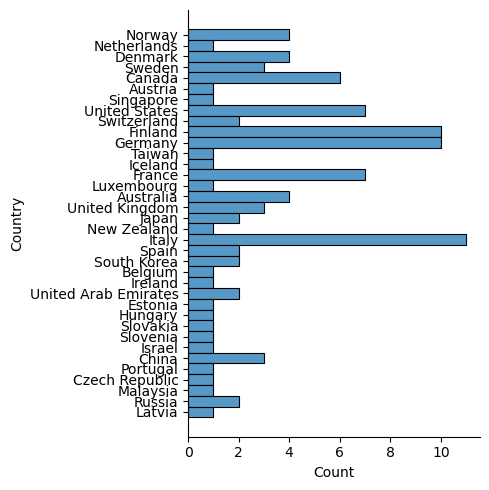

In [267]:
sns.displot(df, y="Country")

### Visualize the distribution of key variables.

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Smart_Mobility '}>,
        <Axes: title={'center': 'Smart_Environment'}>],
       [<Axes: title={'center': 'Smart_Government '}>,
        <Axes: title={'center': 'Smart_Economy '}>,
        <Axes: title={'center': 'Smart_People'}>],
       [<Axes: title={'center': 'Smart_Living'}>,
        <Axes: title={'center': 'SmartCity_Index'}>,
        <Axes: title={'center': 'SmartCity_Index_relative_Edmonton'}>]],
      dtype=object)

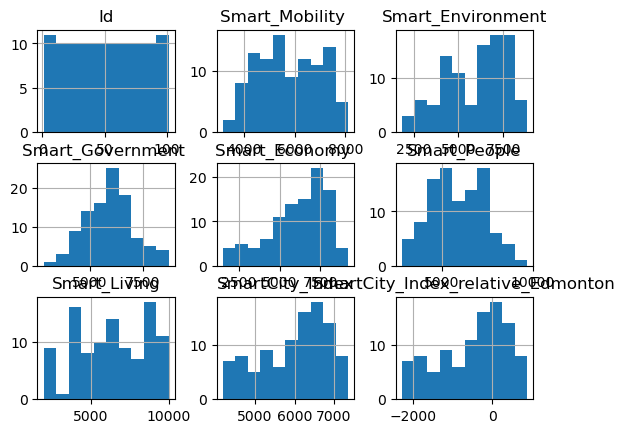

In [139]:
df.hist()

### Explore relationships between variables.


<Axes: >

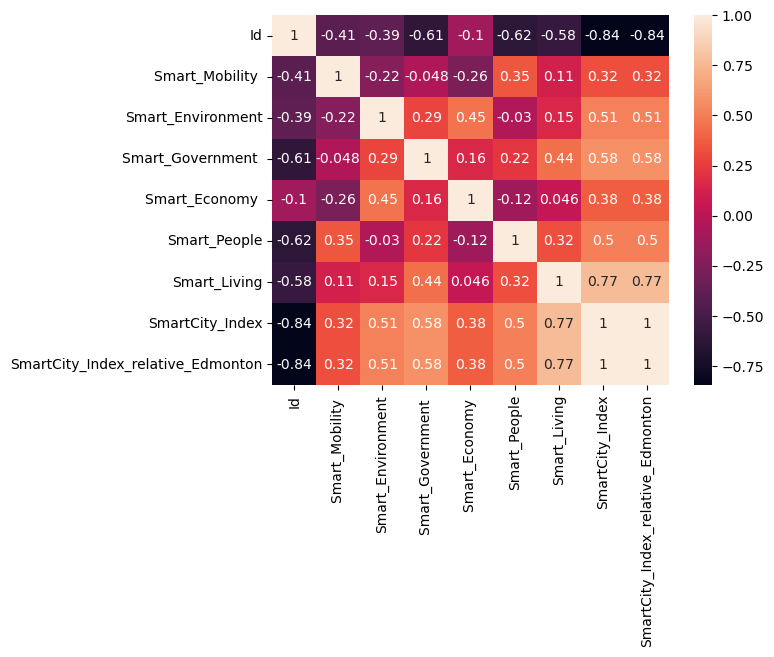

In [255]:
sns.heatmap(df2.corr(), annot =True)